# TASK1 Fiji

I have used the following techniques/algorithms:
- convert to 8-bit image and change the colour scale by changing the lookup table
   - image-transform-rotate 90 degree right
   - image-type-8bit
   - image - look-up-table- (Choose any filter/color you want in the image)
    
- Thresholding 
    - Adjust/auto threshold selecting the Otsu method (on the 8-bit image)
       - image-adjust-auto-threshold-select otsu
    - Process/binary selecting the skeletonize on the thresholded image
        - process- binary-make binary

- Filters used
    - On the original colour image: Process/filters selecting the maximum filter 
        - process- filter - maximum filter 
        - (takes all the highest values from the range)- so image is much lighter
    - On the original colour image: Process/filters selecting the minimum filter 
        - process- filter - minimum filter 
        - (takes all the lowest values from the range)- so image is much darker
    - filter/gaussian with a sigma value of 5
        - process- filter - Gaussian blur--chose the sigma values 
        - higher sigma, more blur image


# Task2 Python 
Now import the original image into Python. 

- Apply a gaussian filter with sigma=5 using the gaussian filter from thee scikit-image packageLinks to an external site.
- Apply an Otsu thresholded image by using the otsu function in scikit-imageLinks to an external site.
Compare the results from Fiji and Python and check that you get the same results.

In [32]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray


# Filters
from skimage.filters import gaussian

#Thresholding
from skimage.filters import try_all_threshold
from skimage.filters import threshold_otsu

In [33]:
def get_image(name):
    """ Using the skimage.io import the image with the file name.
    This function returns the gray image as numpy array """
    
    #Getting the image  
    #filename = '../Images/'+name
    filename = name
    image = io.imread(filename, as_gray = False) 

    return image

In [34]:
def show_image(image, label ="Image:", size=(6,2), cmap='viridis'):
    """This function shows/plots the given image."""
    plt.subplots(1,1,figsize=size)
    plt.title(label = label, fontsize=12)
    plt.imshow(image, cmap=cmap) 
    plt.show()

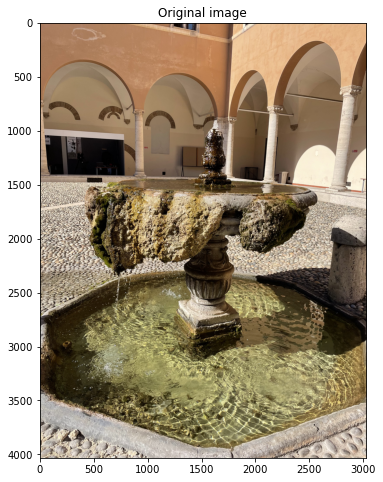

In [35]:
#reading image
fountain = get_image('fountain.jpg')

# # display image
show_image(fountain, label ="Original image", size=(14,8), cmap='gray')


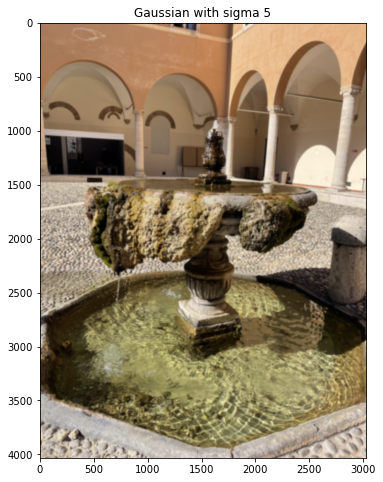

In [36]:
gausian_filtered = gaussian(fountain, sigma=5)
# # display image
show_image(gausian_filtered, label ="Gaussian with sigma 5", size=(14,8), cmap='gray')

# Python TASK2

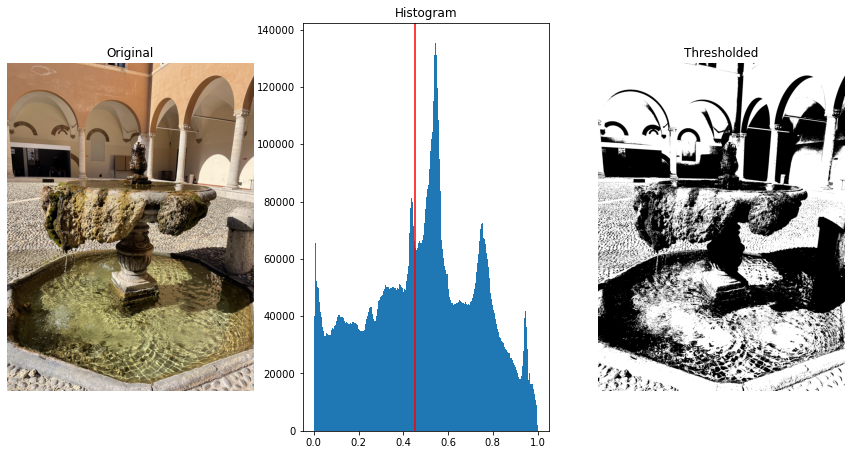

In [37]:
#Thresholding by Otsu
fountain_gray = rgb2gray(fountain) #gray Image
thresh = threshold_otsu(fountain_gray)
binary = fountain_gray > thresh

#Displaying the resesults

fig, axes = plt.subplots(ncols=3, figsize=(15, 7.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(fountain, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(fountain_gray.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

# extra trying all all the threshold methods

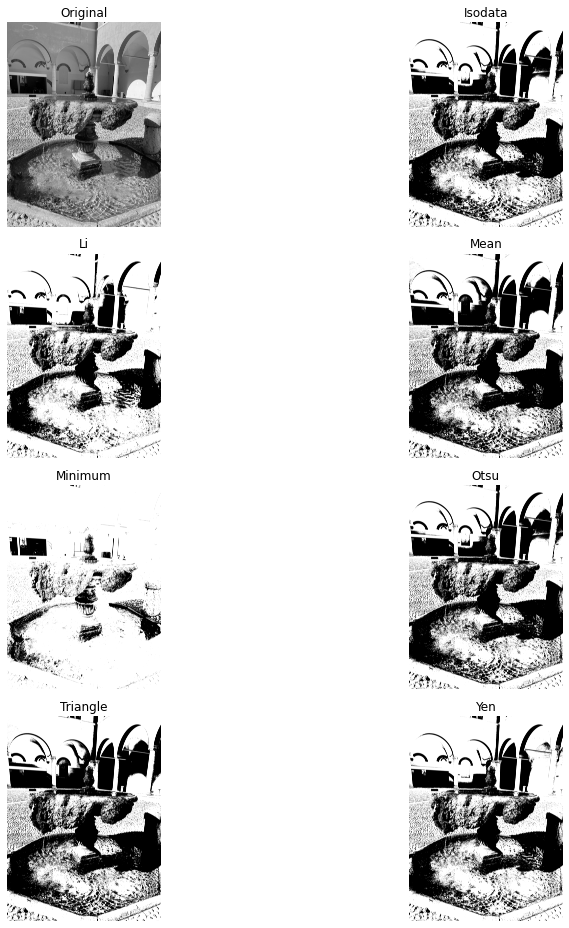

In [38]:
fig, ax = try_all_threshold(fountain_gray, figsize=(15, 13), verbose=False)
plt.show()